Tutorial - Part #5 - Image Co-addition
======================================

## Introduction

For image coaddition the package has a module called `operations`, which implements a main `coadd` function to estimate multiple-image stacking.


In [1]:
from copy import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

%matplotlib inline

In [2]:
from astropy.io.fits import getdata

In [3]:
from astropy.visualization import LinearStretch, LogStretch
from astropy.visualization import ZScaleInterval, MinMaxInterval
from astropy.visualization import ImageNormalize

In [4]:
palette = copy(plt.cm.gray)
palette.set_bad('r', 0.75)

In [5]:
import properimage.single_image as si
from properimage.operations import coadd

In [12]:
from glob import glob
import os

imgs = glob(os.path.join('../../../data', '*.fit'))

In [13]:
imgs

['../../../data/aligned_eso085-030-004.fit',
 '../../../data/aligned_eso085-030-005.fit']

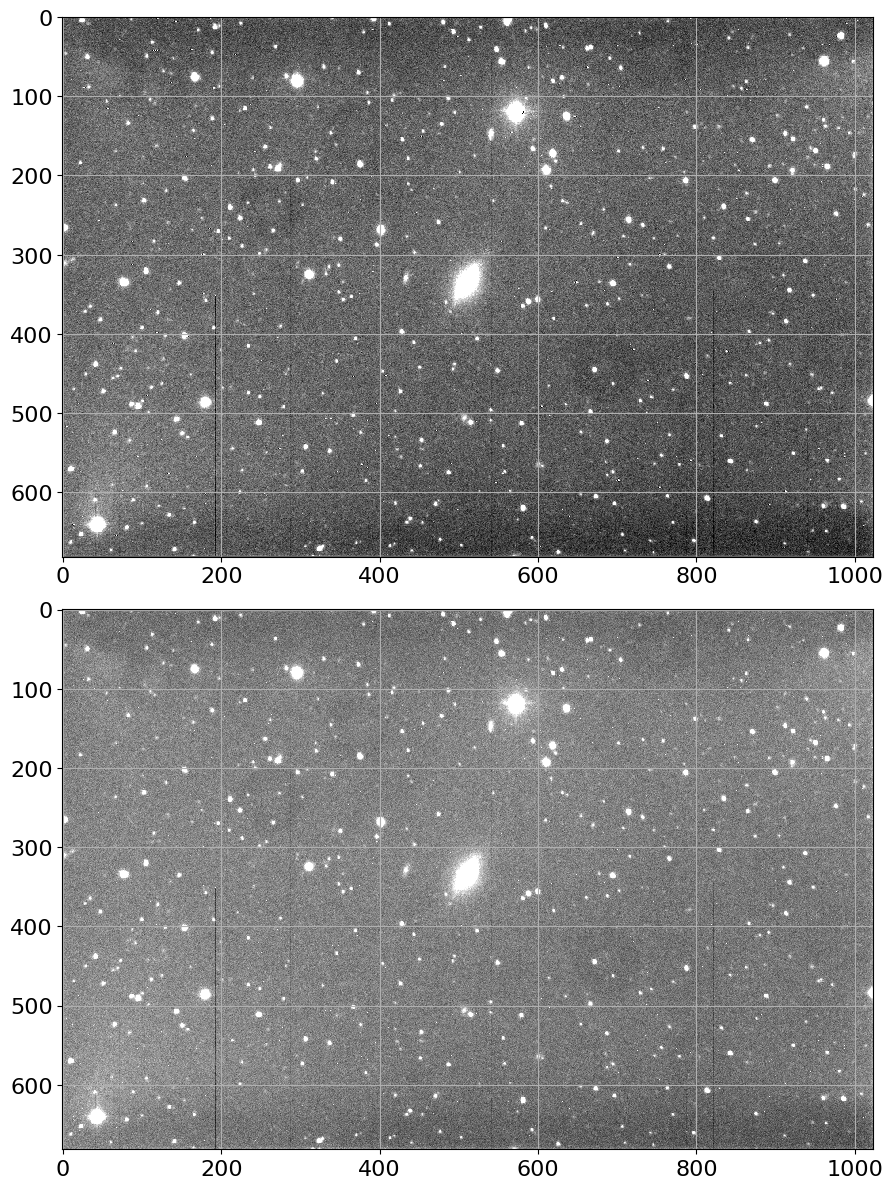

In [15]:
plt.figure(figsize=(16, 12))
plt.subplot(211)
im1 = getdata(imgs[0])
norm = ImageNormalize(im1, interval=ZScaleInterval(),
                      stretch=LinearStretch())
plt.imshow(im1, cmap=plt.cm.gray, norm=norm, interpolation='none')
plt.tick_params(labelsize=16)
plt.grid()

plt.subplot(212)
im2 = getdata(imgs[1])
norm = ImageNormalize(im2, interval=ZScaleInterval(),
                      stretch=LinearStretch())
plt.imshow(im2, cmap=plt.cm.gray, norm=norm, interpolation='none')
plt.tick_params(labelsize=16)
plt.grid()

plt.tight_layout()

In [16]:
coadd?

Signature: coadd(si_list, align=True, inf_loss=0.2, n_procs=2)
Docstring:
Coadd a list of SingleImage instances using R estimator with joblib.

Parameters:
-----------
align : bool
    Whether to align the images before subtracting, default to False
inf_loss : float
    Value of information loss in PSF estimation, lower limit is 0,
    upper is 1. Only valid if fitted_psf=False. Default is 0.25
n_procs : int
    Number of parallel workers to use. If value is one then no parallelism
    is being used. Default 2.

Returns:
--------
R : np.ndarray(n, m) of float
    Coadd image, Zackay's decorrelated R.
P : np.ndarray(n, m) of float
    Coadd image PSF. This is a full PSF image, with a size equal to R
mix_mask : np.ndarray of bool
    Mask of bad pixels for subtracion image, with True marking bad pixels
File:      ~/Devel/QuatroPe/ProperImage/properimage/operations.py
Type:      function

In [23]:
%%time

R, P_r, mix_mask = coadd(
    imgs, align=False, n_procs=1,
)

CPU times: user 97.2 ms, sys: 14.4 ms, total: 112 ms
Wall time: 112 ms


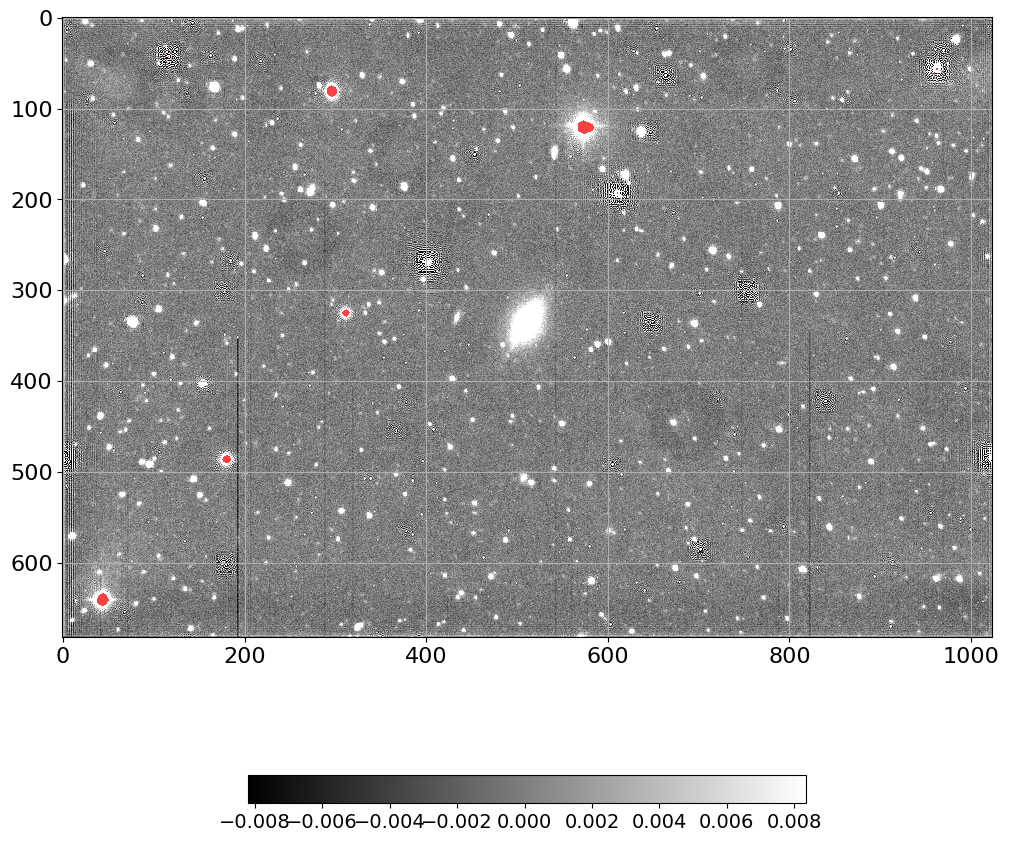

In [24]:
norm = ImageNormalize(R.real, interval=ZScaleInterval(),
                      stretch=LinearStretch())

plt.figure(figsize=(12, 12))
plt.imshow(np.ma.MaskedArray(R.real, mask=mix_mask), 
           cmap=palette, norm=norm, interpolation='none')
plt.tick_params(labelsize=16)
plt.grid()
plt.colorbar(orientation='horizontal', shrink=0.6).ax.tick_params(labelsize=14)

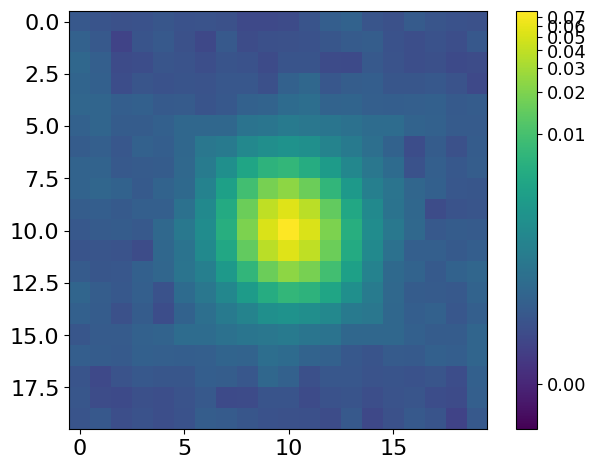

In [29]:
P = P_r.real
norm = ImageNormalize(P, interval=MinMaxInterval(), stretch=LogStretch())
xc, yc = np.where(P==P.max())
xc, yc = np.round(xc[0]), np.round(yc[0])
plt.imshow(P[xc-10:xc+10, yc-10:yc+10], norm=norm,
           cmap='viridis', interpolation='none')
plt.tick_params(labelsize=16)
plt.colorbar().ax.tick_params(labelsize=13)
plt.tight_layout()